In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [4]:
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
today = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()


In [7]:
tickers = ["SPY", "AGG"]

In [8]:
timeframe = "1Day"

In [9]:
start_date = pd.Timestamp("1990-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()

In [17]:
# Get closing prices for SPY & AGG for past 31 years
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,108.54,108.8400,108.43,108.82,4259986,15562,108.754152,AGG
2015-12-02 05:00:00+00:00,108.73,108.7799,108.61,108.67,2462787,11581,108.684692,AGG
2015-12-03 05:00:00+00:00,108.41,108.4100,107.81,107.89,4634020,16801,108.040315,AGG
2015-12-04 05:00:00+00:00,108.05,108.3000,108.00,108.24,2182057,9796,108.192232,AGG
2015-12-07 05:00:00+00:00,108.30,108.5800,108.23,108.40,2143773,9104,108.460067,AGG


In [11]:
# Get closing prices for SPY & AGG for past 31 years

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

df_portfolio_year = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# set in ascending order (past to present)
df_portfolio_year = df_portfolio_year.sort_index()

df_portfolio_year.head()

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2015-12-01 05:00:00+00:00  209.42  210.8200  209.1100  210.68   97858418   
2015-12-02 05:00:00+00:00  210.60  211.0000  208.2300  208.54  108069059   
2015-12-03 05:00:00+00:00  208.90  209.1500  204.7511  205.58  166224154   
2015-12-04 05:00:00+00:00  206.10  209.9700  205.9300  209.66  192878747   
2015-12-07 05:00:00+00:00  209.20  209.7295  207.2000  208.27  102027111   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2015-12-01 05:00:00+00:00      337780  209.921410  108.54  108.8400  108.43   
2015-12-02 05:00:00+00:00      367013  209.563055  108.73  108.7799  108.61   
2015-12-03 05:00:00+00:00      546768  206.878936  108.41  108.4100  107.81   
2015-12-04 05:00:00+00:00      556731  208.178631  108.05  108.3000  108.00   
2015-12-07 05:00:00+00:00      374705  208.276128  108.30  108.5800  108.23   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2015-12-01 05:00:00+00:00  108.82  4259986       15562  108.754152  
2015-12-02 05:00:00+00:00  108.67  2462787       11581  108.684692  
2015-12-03 05:00:00+00:00  107.89  4634020       16801  108.040315  
2015-12-04 05:00:00+00:00  108.24  2182057        9796  108.192232  
2015-12-07 05:00:00+00:00  108.40  2143773        9104  108.460067

In [42]:

df_closing_prices = pd.DataFrame()

df_closing_prices["SPY"] = df_portfolio_year["SPY"]["close"]
df_closing_prices["AGG"] = df_portfolio_year["AGG"]["close"]

df_closing_prices.index = df_closing_prices.index.date

df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns.head(10)


,SPY,AGG
2015-12-02,-0.010158,-0.001378
2015-12-03,-0.014194,-0.007178
2015-12-04,0.019846,0.003244
2015-12-07,-0.006630,0.001478
2015-12-08,-0.006146,0.000369
2015-12-09,-0.008020,0.000000
2015-12-10,0.002581,-0.000184
2015-12-11,-0.019334,0.002490
2015-12-14,0.005548,-0.004692
2015-12-15,0.010148,0.000092


In [20]:
# Create a simulation object
# This portfolio will have a 80/20 split between msft and aapl set in the weight parameter
# We set the number of simulations trials to be 100
# The period over which we will simulate is the number of trading days in a year times the number of years until the child reaches college.
# for this example, the child is 8 years old (meaning 10 years until college)
higher_risk_df = MCSimulation(
    portfolio_data=df_portfolio_year,
    weights=[0.80, 0.20],
    num_simulation=100,
    num_trading_days=252*10,
)

In [22]:
higher_risk_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000424,1.007757,0.991734,1.007239,1.005934,1.003670,0.998068,1.013328,0.997172,0.988139,...,1.003230,0.981645,1.017046,1.006823,1.013686,1.004386,0.995309,1.002759,0.999354,1.000281
2,0.987277,1.020191,0.973078,1.006641,0.986560,0.992384,1.007000,1.019990,0.991530,0.981907,...,1.004205,0.983378,1.020151,0.996832,1.018051,1.011197,1.001064,1.009656,1.009059,1.001709
3,0.992754,1.026318,0.970676,1.012954,0.969602,0.990529,0.992748,1.022871,0.977510,0.983084,...,0.996135,0.983273,1.024500,0.979076,1.034670,1.020705,1.016060,1.000804,1.011274,1.007875
4,0.987846,1.031189,0.963813,1.024840,0.984681,1.011702,0.995332,1.016662,0.975661,0.978092,...,1.010043,0.989086,1.027023,0.979078,1.045545,1.047018,1.027202,0.989318,1.007731,1.009808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.288158,2.519005,3.437806,5.207109,3.168957,1.659295,6.335478,6.579573,3.064703,2.329634,...,2.584197,1.849350,3.688639,2.989738,3.739971,2.127481,2.005271,3.912141,2.676723,2.179018
2517,2.276429,2.521748,3.464664,5.198898,3.140998,1.652466,6.375099,6.537342,3.061444,2.351131,...,2.576157,1.826927,3.679872,3.023006,3.761029,2.120485,2.007882,3.899558,2.667758,2.179963
2518,2.275289,2.513815,3.472808,5.232984,3.193361,1.676446,6.390106,6.594900,3.056646,2.397569,...,2.566220,1.786122,3.697935,3.017709,3.808855,2.100417,2.012067,3.889383,2.677472,2.168357
2519,2.295661,2.535108,3.517143,5.202926,3.233751,1.681906,6.416578,6.507621,3.029180,2.382318,...,2.553364,1.784161,3.750874,2.993797,3.839438,2.061015,2.030651,3.936054,2.691079,2.193932


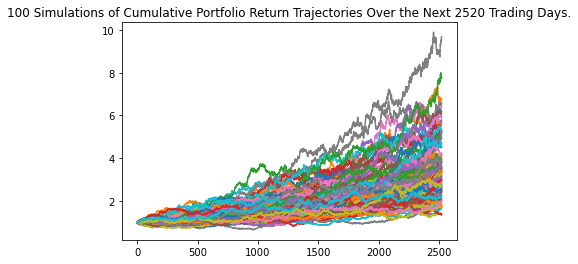

In [23]:
higher_risk_mc_sim = higher_risk_df.plot_simulation()

In [14]:
higher_risk_df.portfolio_data.head()

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2015-12-01 05:00:00+00:00  209.42  210.8200  209.1100  210.68   97858418   
2015-12-02 05:00:00+00:00  210.60  211.0000  208.2300  208.54  108069059   
2015-12-03 05:00:00+00:00  208.90  209.1500  204.7511  205.58  166224154   
2015-12-04 05:00:00+00:00  206.10  209.9700  205.9300  209.66  192878747   
2015-12-07 05:00:00+00:00  209.20  209.7295  207.2000  208.27  102027111   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00      337780  209.921410          NaN  108.54   
2015-12-02 05:00:00+00:00      367013  209.563055    -0.010158  108.73   
2015-12-03 05:00:00+00:00      546768  206.878936    -0.014194  108.41   
2015-12-04 05:00:00+00:00      556731  208.178631     0.019846  108.05   
2015-12-07 05:00:00+00:00      374705  208.276128    -0.006630  108.30   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2015-12-01 05:00:00+00:00  108.8400  108.43  108.82  4259986       15562   
2015-12-02 05:00:00+00:00  108.7799  108.61  108.67  2462787       11581   
2015-12-03 05:00:00+00:00  108.4100  107.81  107.89  4634020       16801   
2015-12-04 05:00:00+00:00  108.3000  108.00  108.24  2182057        9796   
2015-12-07 05:00:00+00:00  108.5800  108.23  108.40  2143773        9104   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  108.754152          NaN  
2015-12-02 05:00:00+00:00  108.684692    -0.001378  
2015-12-03 05:00:00+00:00  108.040315    -0.007178  
2015-12-04 05:00:00+00:00  108.192232     0.003244  
2015-12-07 05:00:00+00:00  108.460067     0.001478

In [24]:
# Set weights for low risk portfolio (20% SPY, 80% AGG)
low_risk_df = MCSimulation(
    portfolio_data=df_portfolio_year,
    weights=[0.20, 0.80],
    num_simulation=100,
    num_trading_days=252*10,
)

In [25]:
low_risk_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997575,0.994645,1.007288,1.004028,1.006813,0.994519,1.002271,0.996078,0.999363,1.001392,...,0.999657,0.996659,0.994167,0.999750,0.999211,1.000136,0.999354,1.000330,0.997254,0.997871
2,1.004355,0.998023,1.008650,1.001472,1.004471,0.996971,0.997588,0.998704,1.001179,1.003906,...,1.004260,0.994406,0.993034,1.000438,1.001284,1.001029,1.002258,1.001329,0.996726,0.994387
3,1.005057,1.000802,1.005381,1.003225,1.002541,0.996403,0.997232,1.000674,1.005270,1.001825,...,1.008561,0.995717,0.990348,1.002071,0.999325,1.003853,1.008418,1.005129,0.993051,1.003811
4,0.999535,1.006137,1.004550,1.007980,1.006208,0.997773,0.993392,0.999171,1.006742,1.001871,...,1.008740,0.989112,0.991712,1.005322,1.001197,1.011526,1.001712,1.003569,0.990970,1.001925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.308289,1.461023,1.310880,1.202138,1.568995,1.298738,0.970194,1.225289,1.351567,1.310020,...,1.633447,1.999084,1.570886,1.218150,1.710301,1.799702,1.359583,1.288450,1.917194,1.242330
2517,1.298610,1.457599,1.315639,1.203063,1.567436,1.300866,0.969858,1.221072,1.351923,1.309335,...,1.639376,2.009132,1.566628,1.210033,1.715461,1.800962,1.362160,1.286679,1.907696,1.247940
2518,1.301033,1.460465,1.317255,1.202894,1.571743,1.295652,0.962977,1.227149,1.348631,1.311698,...,1.640138,2.007580,1.564085,1.209279,1.718062,1.796587,1.363330,1.284065,1.901624,1.251637
2519,1.298139,1.464044,1.323080,1.204150,1.568648,1.295951,0.959786,1.228259,1.349494,1.315045,...,1.639610,2.014274,1.563987,1.204723,1.722098,1.798288,1.368975,1.279140,1.893143,1.253603


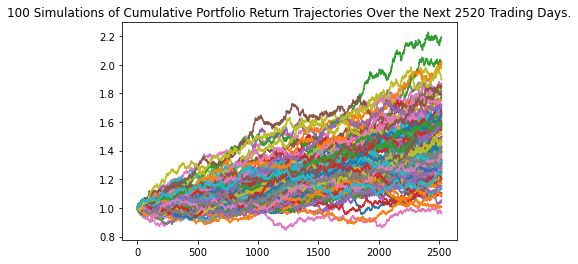

In [26]:
low_risk_mc_sim = low_risk_df.plot_simulation()

In [31]:
# get summary statistics from the simulated daily returns
higher_risk_sim_returns = {
    "mean": list(higher_risk_df.simulated_return.mean(axis=1)),
    "median": list(higher_risk_df.simulated_return.median(axis=1)),
    "min": list(higher_risk_df.simulated_return.min(axis=1)),
    "max": list(higher_risk_df.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
higher_risk_sim_returns = pd.DataFrame(higher_risk_sim_returns)

# Show data
higher_risk_sim_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001229,1.000538,0.981561,1.023062
2,1.000631,1.000612,0.973078,1.032857
3,1.001290,1.002005,0.969602,1.046997
4,1.004079,1.004541,0.951084,1.054909


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of 80/20 Portfolio Over the Next 10 Years'}>

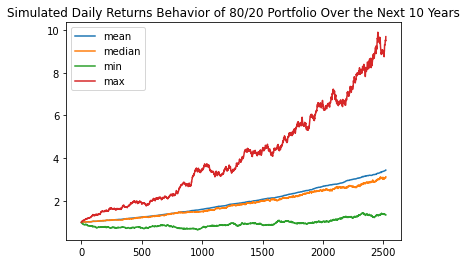

In [32]:
higher_risk_sim_returns.plot(title="Simulated Daily Returns Behavior of 80/20 Portfolio Over the Next 10 Years")

In [33]:
# get summary statistics from the simulated daily returns
low_risk_sim_returns = {
    "mean": list(low_risk_df.simulated_return.mean(axis=1)),
    "median": list(low_risk_df.simulated_return.median(axis=1)),
    "min": list(low_risk_df.simulated_return.min(axis=1)),
    "max": list(low_risk_df.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
low_risk_sim_returns = pd.DataFrame(low_risk_sim_returns)

# Show data
low_risk_sim_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000028,0.999703,0.990589,1.007587
2,0.999841,1.000238,0.989400,1.008650
3,1.000335,1.000738,0.985487,1.014655
4,1.000690,1.000888,0.985057,1.016164


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of 20/80 Portfolio Over the Next 10 Years'}>

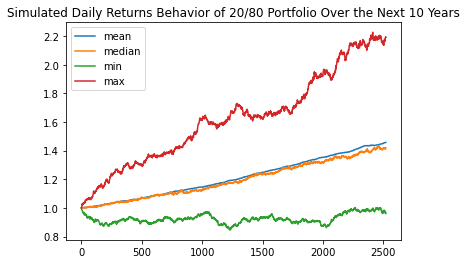

In [34]:
low_risk_sim_returns.plot(title="Simulated Daily Returns Behavior of 20/80 Portfolio Over the Next 10 Years")

In [35]:
# Cumulative Returns of higher risk portfolio
higher_risk_cumulative_returns = (1 + higher_risk_df).cumprod()
higher_risk_cumulative_returns.head()

TypeError: unsupported operand type(s) for +: 'int' and 'MCSimulation'

In [39]:
weights = [0.80, 0.20]
higher_risk_portfolio_returns = daily_returns.dot(weights)
higher_risk_portfolio_returns.head()

ValueError: Dot product shape mismatch, (1532, 14) vs (2,)

In [13]:
low_risk_df.portfolio_data.head()

NameError: name 'low_risk_df' is not defined

In [17]:
# Cumulative Returns of low risk portfolio
low_risk_cumulative_returns = (1 + low_risk_portfolio).cumprod()
low_risk_cumulative_returns.head()

NameError: name 'low_risk_portfolio' is not defined

In [16]:
agg_daily_return = AGG.pct_change()
agg_daily_return

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-02 05:00:00+00:00,0.001751,-0.000552,0.001660,-0.001378,-0.421879,-0.255815,-0.000639
2015-12-03 05:00:00+00:00,-0.002943,-0.003400,-0.007366,-0.007178,0.881616,0.450738,-0.005929
2015-12-04 05:00:00+00:00,-0.003321,-0.001015,0.001762,0.003244,-0.529122,-0.416939,0.001406
2015-12-07 05:00:00+00:00,0.002314,0.002585,0.002130,0.001478,-0.017545,-0.070641,0.002476
...,...,...,...,...,...,...,...
2021-12-27 05:00:00+00:00,-0.001225,-0.000087,0.000526,0.000525,-0.012771,-0.098702,0.000701
2021-12-28 05:00:00+00:00,0.002453,0.001312,0.000350,-0.000438,-0.033580,0.056784,0.000453
2021-12-29 05:00:00+00:00,-0.003845,-0.003495,-0.003153,-0.002977,0.128607,0.111431,-0.003318


In [26]:
agg_cumulative_return = (1 + agg_daily_return).cumprod() - 1
agg_cumulative_return

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-06-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-02 04:00:00+00:00,0.000256,0.000597,0.000597,0.000852,-0.231745,-0.135220,0.000647
2020-06-03 04:00:00+00:00,-0.000170,0.000086,-0.001535,-0.001619,0.089171,0.035721,-0.001567
2020-06-04 04:00:00+00:00,-0.000682,-0.000851,-0.003582,-0.004601,-0.103473,-0.134168,-0.003312
2020-06-05 04:00:00+00:00,-0.005113,-0.004173,-0.006482,-0.004004,-0.074140,0.207665,-0.005334
